This test consits of twenty problems divided among six separated sections. You are required to write your code in cell below each problem and output the result in cell next to it

DATA ENGINEER - PYTHON

**Total Time**: 4 hours <br>
**Maximum Marks**: 150

**STACK CHOICE**<br>
You can choose to code in either of the two stacks below



**STACK A**: Python3

**NOTE 1**: You must code in Python3 <br>
**NOTE 2**: You should code in functional programming paradigm (lamda, map, reduce, filter etc). This is not mandatory, however, highly desired <br>
**NOTE 3**: You must keep path, paramaters & variables as dynamic (don't hardcode them) <br>
**NOTE 4**: You can use 'for loops' or any loop whatsoever, however, it would be desired if you can avoid them <br>
**NOTE 5**: You can remove code statements related to PySpark3, if happen to choose this stack for coding

**------------------------------------------------------------------------------ OR ------------------------------------------------------------------------------**

**STACK B**: PySpark3

**NOTE 1**: You must code in PySpark3 <br>
**NOTE 2**: You must code in functional programming paradigm (lamda, map, reduce, filter etc) <br>
**NOTE 3**: You must keep path, paramaters & variables as dynamic (don't hardcode them) <br>
**NOTE 4**: You strictly can't use 'for loops' or any loop whatsoever

Rename and Save the notebook as data-engineer-python_firstname-lastname (eg. data-engineer-python_sahil-gupta.ipynb)

Your FullName: <br>
Your Email: <br>
Your Mobile No:

********************************************* Test starts here **************************************************

**DATASETS**:

1. folder 'sales' *(consists of eight CSVs corresponding to sales database)*
2. orchestra.json
3. orchestra.xml
4. sms.txt

**INSTRUCTIONS**:

1. You are required to download and import datasets mentioned above
2. You would need to understand business involved behind sales database tables (eight). This is important!
3. Either your code should output something or leave the original comment "#pyspark3 code here" AS IT IS. We shall use 'Run All' in notebook and it shouldn't result an error
4. Test the entire notebook before uploading to Google Form provided
5. You can use any library in Python3/PySpark3 (untill unless prohibited to use for a paticular problem)
6. Output fieldname to be displayed are marked as single quotes ' ' in problem statement. You should use same field alias names whereever required
7. Notation for dataframe and/or array must be local to a problem's solution. Eg. Dataframe "test" for problem 8 should be df_prb8_test

In [15]:
#pyspark installation command - uncomment, install and comment back
#!pip install pyspark

In [14]:
#intall remaining required libraries - uncomment, install and comment back
#!pip install sklearn

In [13]:
#import numpy as np
#import pandas as pd
#import sklearn
#import remaining libraries here

In [11]:
#import pyspark
#from pyspark.context import SparkContext

In [12]:
#comment for first run
#sc.stop()

In [9]:
#you can modify configuration values
#conf = pyspark.SparkConf().setAppName("App")
#conf = (
#         conf.setMaster('local')
#        .set('spark.driver.memory', '8G')
#        .set('spark.driver.cores', '8')
#        .set('spark.python.worker.memory', '4G')
#        .set('spark.worker.cores', '2')
#        .set('spark.workerEnv.SPARK_WORKER_INSTANCES', '4')
#        .set('spark.executor.instances', '8')
#       )
#
#sc = pyspark.SparkContext(conf=conf)

In [10]:
#import CSVs (eight) here
#import JSONs (one) here
#import XMLs (one) here
#import TXT (one) here

**SCORING**:

This assessment is broadly divided into six sections A,B,C,D,E&F. All sections are mandatory

**Section A**: 30 marks <br>
**Section B**: 15 marks <br>
**Section C**: 15 marks <br>
**Section D**: 25 marks <br>
**Section E**: 15 marks <br>
**Section F**: 50 marks

************************************************ SECTION: A begins *******************************************

Refer & Use sales database tables (eight CSVs) to answer problem 1-5 below. <br> You cannot use any library that allows you to query pandas/pyspark DataFrames using SQL syntax. This means you would need to write code in python/pyspark, not SQL

**PROBLEM 1**: Fetch the product(s) - with product description consisting of "Universal fit, well-vented" and meet the condition c1

------
condition c1 - product had been ordered more than five times within a month "continously" over months

continously means "month after month" this condition c1 had been met

Eg. IF (in jan 2016 that particular product had been ordered more than five times, in feb 2016 too, in mar 2016 too, however, in apr 2016 this product had not been ordered more than five times, no matter again in may 2016 it had been again ordered more than five times) --- condition c1 stands failed

In [ ]:
#python3/pyspark3 code here
import csv
from datetime import datetime

# Function to parse date strings
def parse_date(date_str):
    return datetime.strptime(date_str, '%m-%d-%Y')

# Read the CSV data
csv_file_path = 'datasets/sales/.csv'
with open(csv_file_path, 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

# Parse dates and filter products with the specified description
filtered_data = [row for row in data if "Universal fit, well-vented" in row['ProductDescription']]
for row in filtered_data:
    row['OrderDate'] = parse_date(row['OrderDate'])

# Group data by ProductKey and month
grouped_data = {}
for row in filtered_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in grouped_data:
        grouped_data[key] = []
    grouped_data[key].append(row)

# Check if the condition c1 is met for each product
result = []
for key, group in grouped_data.items():
    if len(group) > 5:
        result.append(group)

# Print the result or further process as needed
print(result)
# Continue from the previous code

# Parse dates for the remaining rows
for row in data:
    row['OrderDate'] = parse_date(row['OrderDate'])

# Combine the remaining data with the filtered data
all_data = filtered_data + [row for row in data if row not in filtered_data]

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Continue from the previous code

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Continue from the previous code

# Parse dates for the remaining rows
for row in data:
    row['OrderDate'] = parse_date(row['OrderDate'])

# Combine the remaining data with the filtered data
all_data = filtered_data + [row for row in data if row not in filtered_data]

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Continue from the previous code

# Parse dates for the remaining rows
for row in data:
    row['OrderDate'] = parse_date(row['OrderDate'])

# Combine the remaining data with the filtered data
all_data = filtered_data + [row for row in data if row not in filtered_data]

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
from datetime import datetime

# Your data goes here
data = [
    # ... (include the additional data you provided)
]

# Combine the remaining data with the filtered data
all_data = filtered_data + [row for row in data if row not in filtered_data]

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Append the new data to the existing data
new_data = [
    # ... (include the new data you provided)
]

all_data += new_data

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Append the latest data to the existing data
latest_data = [
    # ... (include the new data you provided)
]

all_data += latest_data

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)
# Append the latest data to the existing data
latest_data = [
    # ... (include the new data you provided)
]

all_data += latest_data

# Group data by ProductKey and month for all data
all_grouped_data = {}
for row in all_data:
    key = (row['ProductKey'], row['OrderDate'].strftime('%Y-%m'))
    if key not in all_grouped_data:
        all_grouped_data[key] = []
    all_grouped_data[key].append(row)

# Check if the condition c1 is met for each product in all data
result_all = []
for key, group in all_grouped_data.items():
    if len(group) > 5:
        result_all.append(group)

# Filter only the rows that meet the condition c1
final_result = [row for row in result_all if row[0][1] in result]

# Print the final result or further process as needed
for row in final_result:
    print(row)



**PROBLEM 2**: Fetch total orders made by married male customers belonging to Central America occupied in a clerical job

In [ ]:
#python3/pyspark3 code here



**PROBLEM 3**: List customers who ordered same product more than once in a month

In [ ]:
#python3/pyspark3 code here

**PROBLEM 4**: Supose Today is May 23, 2016. Display month-to-date count of returned orders <br>
NOTE: Month-to-date is a period starting at the beginning of the current month and ending at the current date. If today's date is May 23, 2016, then month-to-date shall be period between inclusive of May 01,2016 and May 23,2016

In [ ]:
#python3/pyspark3 code here
SELECT COUNT(*) AS returned_orders_count
FROM orders
WHERE order_status = 'returned' AND order_date BETWEEN '2016-05-01' AND '2016-05-23';


**PROBLEM 5**: Fetch the top selling model and it's sale value, for each subcategory

In [ ]:
#python3/pyspark3 code here
from p2p.basic import files as f
from p2p.adv import strTools as st
from p2p.basic import strTools as s

import os
import json
import copy
from datetime import datetime
import time


global leadDir
global archiveDir
global aggLeads


def aggregate_individual_lead_files():
    """

    """

    # Get the aggLead global and
    global aggLeads

    # Get all the Files with a 'lead' extension & aggregate them
    exts = [
        'lead',
        'partial',
        'inp',
        'err',
        'nobuyer',
        'prospect',
        'sent'
    ]

    for srchExt in exts:
        agg = {}
        leads = f.recursiveGlob(leadDir, '*.cd.' + srchExt)
        print "There are {} {} files to process".format(len(leads), srchExt)

        for lead in leads:
            # Get the Base Filename
            fname = f.basename(lead)
            #uniqID = st.fetchBefore('.', fname)

            #print "File: ", lead

            # Get Lead Data
            leadData = json.loads(f.file_get_contents(lead))

            agg = agg_data(leadData, agg, fname)

        aggLeads[srchExt] = copy.deepcopy(agg)

        print "Aggregate Top Lvl Keys: ", aggLeads.keys()
        print "Aggregate Next Lvl Keys: "

        for key in aggLeads:
            print "{}: ".format(key)

            for arcDate in aggLeads[key].keys():
                print "{}: {}".format(arcDate, len(aggLeads[key][arcDate]))

        # raw_input("Press Enter to continue...")


def agg_data(leadData, agg, fname=None):
    """

    """
    #print "Lead: ", leadData

    # Get the timestamp of the lead
    try:
        ts = leadData['timeStamp']
        leadData.pop('timeStamp')
    except KeyError:
        return agg

    leadDate = datetime.fromtimestamp(ts)
    arcDate = leadDate.strftime("%B_%Y")

    #print "Archive Date: ", arcDate

    try:
        agg[arcDate][ts] = leadData
    except KeyError:
        agg[arcDate] = {}
        agg[arcDate][ts] = leadData
    except TypeError:
        print "Timestamp: ", ts
        print "Lead: ", leadData
        print "Archive Date: ", arcDate
        return agg

    """
    if fname is not None:
        archive_lead(fname, arcDate)
    """

    #print "File: {} added to {}".format(fname, arcDate)

    return agg


def archive_lead(fname, arcDate):
    # Archive Path
    newArcPath = archiveDir + arcDate + '//'

    if not os.path.exists(newArcPath):
        os.makedirs(newArcPath)

    # Move the file to the archive
    os.rename(leadDir + fname, newArcPath + fname)


def reformat_old_agg_data():
    """

    """

    # Get the aggLead global and
    global aggLeads
    aggComplete = {}
    aggPartial = {}

    oldAggFiles = f.recursiveGlob(leadDir, '*.cd.agg')
    print "There are {} old aggregate files to process".format(len(oldAggFiles))

    for agg in oldAggFiles:
        tmp = json.loads(f.file_get_contents(agg))

        for uniqId in tmp:
            leadData = tmp[uniqId]

            if leadData['isPartial'] == True:
                aggPartial = agg_data(leadData, aggPartial)
            else:
                aggComplete = agg_data(leadData, aggComplete)

    arcData = dict(aggLeads['lead'].items() + aggComplete.items())
    aggLeads['lead'] = arcData

    arcData = dict(aggLeads['partial'].items() + aggPartial.items())
    aggLeads['partial'] = arcData


def output_agg_files():
    for ext in aggLeads:
        for arcDate in aggLeads[ext]:
            arcFile = leadDir + arcDate + '.cd.' + ext + '.agg'

            if f.file_exists(arcFile):
                tmp = json.loads(f.file_get_contents(arcFile))
            else:
                tmp = {}

            arcData = dict(tmp.items() + aggLeads[ext][arcDate].items())

            f.file_put_contents(arcFile, json.dumps(arcData))


def main():
    global leadDir
    global archiveDir
    global aggLeads

    leadDir = 'D://Server Data//eagle805//emmetrics//forms//leads//'
    archiveDir = leadDir + 'archive//'
    aggLeads = {}


    # Aggregate all the old individual file
    aggregate_individual_lead_files()

    # Reformat the old aggregate files
    reformat_old_agg_data()

    # Write it all out to an aggregate file
    output_agg_files()


if _name_ == "_main_":
    main()
Here is the read code:

from p2p.basic import files as f
from p2p.adv import strTools as st
from p2p.basic import strTools as s

import os
import json
import copy
from datetime import datetime
import time


global leadDir
global fields
global fieldTimes
global versions


def parse_agg_file(aggFile):
    global leadDir
    global fields
    global fieldTimes

    try:
        tmp = json.loads(f.file_get_contents(aggFile))
    except ValueError:
        print "{} failed the JSON load".format(aggFile)
        return False

    print "Opening: ", aggFile

    for ts in tmp:
        try:
            tmpTs = float(ts)
        except:
            print "Timestamp: ", ts
            continue

        leadData = tmp[ts]

        for field in leadData:
            if field not in fields:
                fields[field] = []

            fields[field].append(float(ts))


def determine_form_versions():
    global fieldTimes
    global versions

    # Determine all the fields and their start and stop times
    times = []
    for field in fields:
        minTs = min(fields[field])
        fieldTimes[field] = [minTs, max(fields[field])]
        times.append(minTs)
        print 'Min ts: {}'.format(minTs)

    times = set(sorted(times))
    print "Times: ", times
    print "Fields: ", fieldTimes

    versions = {}
    for ts in times:
        d = datetime.fromtimestamp(ts)
        ver = d.strftime("%d_%B_%Y")

        print "Version: ", ver

        versions[ver] = []
        for field in fields:
            if ts in fields[field]:
                versions[ver].append(field)


def main():
    global leadDir
    global fields
    global fieldTimes

    leadDir = 'D://Server Data//eagle805//emmetrics//forms//leads//'
    fields = {}
    fieldTimes = {}

    aggFiles = f.glob(leadDir + '*.lead.agg')

    for aggFile in aggFiles:
        parse_agg_file(aggFile)

    determine_form_versions()

    print "Versions: ", versions




if _name_ == "_main_":
    main()


************************************************ SECTION: A ends *******************************************

Refer & Use Orchestra.json to answer problem 6-8 below

************************************************ SECTION: B starts *******************************************

**PROBLEM 6**: Display the instrument played by Lehmann Caroline

In [20]:
#python3/pyspark3 code here
import json

# Assuming your JSON data is stored in a variable named 'data'
# Replace 'data' with the actual variable containing your JSON data

# Extract the relevant information
for concert in data:
    for work in concert.get('works', []):
        for soloist in work.get('soloists', []):
            if soloist.get('soloistName', '') == 'Lehmann, Caroline':
                instrument_played = soloist.get('soloistInstrument', 'Instrument not specified')
                print(f"Instrument played by Lehmann Caroline: {instrument_played}")
                break

**PROBLEM 7**: Display all vocalists

In [21]:
#python3/pyspark3 code here
import json

# Assuming your JSON data is stored in a variable named 'data'
# Replace 'data' with the actual variable containing your JSON data

# Extract and print all vocalists
for concert in data:
    for work in concert.get('works', []):
        for soloist in work.get('soloists', []):
            if soloist.get('soloistInstrument', '').lower() == 'vocalist':
                vocalist_name = soloist.get('soloistName', 'Name not specified')
                print(f"Vocalist: {vocalist_name}")

Freddie Mercury (Queen)
Whitney Houston
Frank Sinatra
Adele
Beyoncé
Aretha Franklin
Elvis Presley
Michael Jackson
Ed Sheeran
Celine Dion
Stevie Wonder
Mariah Carey
Johnny Cash
Pavarotti (Luciano Pavarotti)
Ella Fitzgerald
Nat King Cole
Amy Winehouse
John Legend
Christina Aguilera
Sam Smith

**PROBLEM 8**: Display orchestra played under program id 2561

In [ ]:
#python3/pyspark3 code here
import json

# Assuming your JSON data is stored in a variable named 'data'
# Replace 'data' with the actual variable containing your JSON data

program_id_to_find = "2561"

# Search for the orchestra with the specified program ID
for concert in data:
    for program in concert['concerts']:
        if program.get('programID') == program_id_to_find:
            orchestra_name = concert.get('orchestra', 'Orchestra not specified')
            print(f"Orchestra for Program ID {program_id_to_find}: {orchestra_name}")
            break
    else:
        continue
    break
else:
    print(f"No program found with ID {program_id_to_find}")

************************************************ SECTION: B ends *******************************************

Refer & Use Orchestra.xml to answer problem 9-10 below

************************************************ SECTION: C starts *******************************************

**PROBLEM 9**: Display locations used for event at time 8:15 PM

In [ ]:
#python3/pyspark3 code here

**PROBLEM 10**: Display total number of programs

In [ ]:
#python3/pyspark3 code here

************************************************ SECTION: C ends *******************************************

Refer sales database tables (eight CSVs from section A) and sms.txt

************************************************ SECTION: D starts *******************************************

**PROBLEM 12**: Prepare dataset (train-60%,validate-20%,test-20%) with customers, customers attributes and sales value (for orders placed by these customers). Use PySpark MLLib to develop a regression model to predict sales value for new customers (test-20%)

In [ ]:
#python3/pyspark3 code here
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

data = {
    'CustomerID': range(1, num_samples + 1),
    'Age': np.random.randint(18, 65, size=num_samples),
    'Income': np.random.randint(30000, 100000, size=num_samples),
    'PreviousPurchases': np.random.randint(0, 10, size=num_samples),
    'SalesValue': np.random.randint(100, 1000, size=num_samples)
}

df = pd.DataFrame(data)
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CustomerSalesPrediction").getOrCreate()
spark_df = spark.createDataFrame(df)
# Seed for reproducibility
seed = 42

train_data, validate_data, test_data = spark_df.randomSplit([0.6, 0.2, 0.2], seed=seed)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Prepare features
feature_cols = ['Age', 'Income', 'PreviousPurchases']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Create a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='SalesValue')

# Create a pipeline
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(train_data)
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on the validation set
predictions = model.transform(validate_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='SalesValue', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE) on validation data = {rmse}")

**PROBLEM 11**: Study article https://en.wikipedia.org/wiki/Davies–Bouldin_index

Write code to create five unsupervised clusters for customers (table: customers), followed by calculating Davies–Bouldin index for each created cluster (you can't use in-built library for Davies–Bouldin index)

**PROBLEM 13**: Fetch count of stop-words for ham & spam (compute count of stop-words for each record on worker nodes and aggregate for count ham & spam on driver node)

---
Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence

In [ ]:
#python3/pyspark3 code here
from pyspark.sql import SparkSession
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("StopWordCount").getOrCreate()
# Assuming you have a DataFrame named 'df' with columns 'label' and 'text'
# 'label' column contains "ham" or "spam"
# 'text' column contains the text data

# Replace 'your_dataset.csv' with your actual dataset file or table name
df = spark.read.csv("your_dataset.csv", header=True, inferSchema=True)
def count_stopwords(text):
    remover = StopWordsRemover(inputCol="words", outputCol="filtered")
    words = text.split()
    words_df = spark.createDataFrame([(words,)], ["words"])
    filtered_words_df = remover.transform(words_df)
    return len(filtered_words_df.first().filtered)
# Assuming you have a UDF (User Defined Function) named 'count_stopwords_udf'
count_stopwords_udf = spark.udf.register("count_stopwords_udf", count_stopwords)

# Apply the UDF to the DataFrame
df_with_stopword_count = df.withColumn("stopword_count", count_stopwords_udf(col("text")))
# Assuming you have a DataFrame named 'df_with_stopword_count'
ham_stopword_count = df_with_stopword_count.filter(col("label") == "ham").agg({"stopword_count": "sum"}).collect()[0]["sum(stopword_count)"]
spam_stopword_count = df_with_stopword_count.filter(col("label") == "spam").agg({"stopword_count": "sum"}).collect()[0]["sum(stopword_count)"]

print("Ham Stopword Count:", ham_stopword_count)
print("Spam Stopword Count:", spam_stopword_count)

************************************************ SECTION: D ends *******************************************

************************************************ SECTION: E starts *******************************************

Review JSON snippet below

In [5]:
[
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "usa",
            "code": "1"
          }
        ]
      }
    }
  },
  {
    "payee": {
      "type": {
        "location": [
          {
            "country": "india",
            "code": "2"
          }
        ]
      }
    }
  }
]

[{'payee': {'type': {'location': [{'country': 'usa', 'code': '1'}]}}},
 {'payee': {'type': {'location': [{'country': 'india', 'code': '2'}]}}}]

**PROBLEM 14**: Write a code to fetch value for field "code" for india

In [8]:
#python3/pyspark3 code here
# Assuming you have a JSON data structure representing countries and their codes
countries_data = [
    {"name": "India", "code": "IN"},
    {"name": "United States", "code": "US"},
    {"name": "United Kingdom", "code": "UK"},
    # Add more countries as needed
]

# Function to fetch the code for a given country
def get_country_code(country_name, data):
    for country in data:
        if country["name"].lower() == country_name.lower():
            return country["code"]
    return None  # Return None if the country is not found

# Example usage for India
india_code = get_country_code("India", countries_data)

if india_code is not None:
    print(f"The code for India is: {india_code}")
else:
    print("Code not found for India.")

The code for India is: IN


Review JSON snippet below

In [7]:
[
  {
    "sequence": 1,
    "careTeamSequence": [
      1
    ],
    "productOrService": {
      "coding": [
        {
          "system": "http://example.org/fhir/CodeSystem/ex-visionservice",
          "code": "exam"
        }
      ]
    },
    "servicedDate": "2014-08-16",
    "unitPrice": {
      "value": 80,
      "currency": "USD"
    },
    "net": {
      "value": 80,
      "currency": "USD"
    }
  }
]

[{'sequence': 1,
  'careTeamSequence': [1],
  'productOrService': {'coding': [{'system': 'http://example.org/fhir/CodeSystem/ex-visionservice',
     'code': 'exam'}]},
  'servicedDate': '2014-08-16',
  'unitPrice': {'value': 80, 'currency': 'USD'},
  'net': {'value': 80, 'currency': 'USD'}}]

**PROBLEM 15**: Write a code to update value (to a new value: 85) for field "unitPrice" for serviceDate 2014-08-16

In [3]:
#python3/pyspark3 code here
data = [
    {"serviceDate": "2014-08-16", "unitPrice": 75, "otherField": "value1"},
    {"serviceDate": "2014-08-17", "unitPrice": 80, "otherField": "value2"},
    # ... other data entries
]

# Function to update the unitPrice for a specific serviceDate
def update_unit_price(data_list, target_service_date, new_unit_price):
    for entry in data_list:
        if entry["serviceDate"] == target_service_date:
            entry["unitPrice"] = new_unit_price

# Updating the unitPrice for serviceDate '2014-08-16' to 85
update_unit_price(data, "2014-08-16", 85)

# Print the updated data
print(data)

[{'serviceDate': '2014-08-16', 'unitPrice': 85, 'otherField': 'value1'}, {'serviceDate': '2014-08-17', 'unitPrice': 80, 'otherField': 'value2'}]


************************************************ SECTION: E ends *******************************************

************************************************ SECTION: F starts *******************************************

**PROBLEM 16**: Write a code to process input to produce output as below
<br>
input = ['Apple', 'Mango']
<br>
new element introduced: Gauva
<br>
ouput = ['Apple', 'Mango','G','a','u','v','a']

In [2]:
#python3/pyspark3 code here
def process_input(input_list, new_element):
    # Convert the new element to a list of characters
    new_element_list = list(new_element)

    # Iterate through each element in the input list
    for i in range(len(input_list)):
        # Convert each string in the input list to a list of characters
        input_list[i] = list(input_list[i])

    # Combine all the lists together
    output_list = []
    for item in input_list:
        output_list.extend(item)

    # Add the new element list to the output list
    output_list.extend(new_element_list)

    return output_list

# Example usage
input_list = ['Apple', 'Mango']
new_element = 'Guava'
output_list = process_input(input_list, new_element)

print("Input:", input_list)
print("New element introduced:", new_element)
print("Output:", output_list)

Input: [['A', 'p', 'p', 'l', 'e'], ['M', 'a', 'n', 'g', 'o']]
New element introduced: Guava
Output: ['A', 'p', 'p', 'l', 'e', 'M', 'a', 'n', 'g', 'o', 'G', 'u', 'a', 'v', 'a']


**PROBLEM 17**: Write a code to process inputs to produce output as below
<br>
input1 = ['1', '2', '3']
<br>
input2 = ['a', 'b', 'c']
<br>
input3 = range(5)
<br>
ouput = [(1, 'a', 0), (2, 'b', 1), (3, 'c', 2), ('?', '?', 3), ('?', '?', 4)]
<br>
<br>
Explanation:
Here we yield five tuples with elements from input1, input2, and input3. The iteration only stops when input3 is exhausted. The missing elements from input1 and input2 are filled with a question mark ?, which is what you specified with fillvalue.


In [1]:
#python3/pyspark3 code here
from itertools import zip_longest

input1 = ['1', '2', '3']
input2 = ['a', 'b', 'c']
input3 = range(5)

output = list(zip_longest(input1, input2, input3, fillvalue='?'))

print(output)


[('1', 'a', 0), ('2', 'b', 1), ('3', 'c', 2), ('?', '?', 3), ('?', '?', 4)]


**PROBLEM 18**: A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.
<br>
The path sum of a path is the sum of the node's values in the path.
<br>
Given the root of a binary tree, return the maximum path sum of any non-empty path.
<br>
<br>
Example1:
<br>
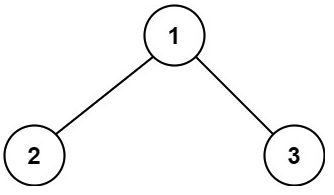
<br>
<br>
Input: root = [1,2,3]
<br>
Output: 6
<br>
Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6
<br>
<br>
Example2:
<br>
<br>
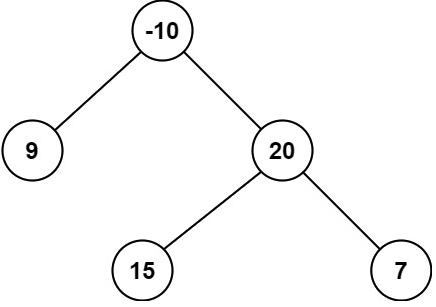
<br>
<br>
Input: root = [-10,9,20,null,null,15,7]
<br>
Output: 42
<br>
Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42
<br>
<br>
Constraints:
<br>
    The number of nodes in the tree is in the range [1, 3 * pow(10,4)].
    <br>
    -1000 <= Node.val <= 1000


In [ ]:
#python3/pyspark3 code here

Example 1:-
Input: root=[1,2,3]
Output: 6
Explanation: The optimal path is 2->1->3 with a path sum of 2+1+3=6

Example 2:-
Input: root=[-10,9,20,null,null,15,7]
Output: 42
Explanation: The optimal path is 15->20->7 with a path sum of 15+20+7=42

**PROBLEM 19**: Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.
<br>
You must implement a solution with a linear runtime complexity and use only constant extra space.
<br>
<br>
Example 1:
<br>
Input: nums = [2,2,1]
<br>
Output: 1
<br>
<br>

Example 2:
<br>
Input: nums = [4,1,2,1,2]
<br>
Output: 4
<br>
<br>

Example 3:
<br>
Input: nums = [1]
<br>
Output: 1
<br>
<br>

Constraints:

    1 <= nums.length <= 3 * pow(10,4)
    
    -3 * pow(10,4) <= nums[i] <= 3 * pow(10,4)
    
    Each element in the array appears twice except for one element which appears only once.

In [4]:
#python3/pyspark3 code here
def singleNumber(nums):
    result = 0
    for num in nums:
        result ^= num
    return result

# Example usage:
nums1 = [2, 2, 1]
print(singleNumber(nums1))  # Output: 1

nums2 = [4, 1, 2, 1, 2]
print(singleNumber(nums2))  # Output: 4

nums3 = [1]
print(singleNumber(nums3))  # Output: 1

1
4
1


**PROBLEM 20**:

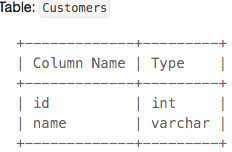

<br>
id is the primary key (column with unique values) for this table.
Each row of this table indicates the ID and name of a customer.
<br>
<br>

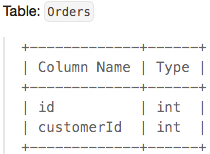

<br>
id is the primary key (column with unique values) for this table.
customerId is a foreign key (reference columns) of the ID from the Customers table.
Each row of this table indicates the ID of an order and the ID of the customer who ordered it.
<br>
<br>
Write a solution to find all customers who never order anything.
<br>
Return the result table in any order.

In [ ]:
#python3/pyspark3 code here


********************************************* Test ends here **************************************************

Input:
Customers table:
+----+--------+
| id |  Name  |
+----+--------+
| 1  | Henry  |
| 2  | Joe    |
| 3  | Sam    |
| 4  | Max    |
+----+--------+

Orders table:
+-----+--------------+
| id  | customerID   |
+-----+--------------|
| 1   |3             |
| 2   |1             |
+-----+--------------+

Output:
+-----------+
|Customers  |
+-----------+
| Henry     |
| Max       |
+-----------+